# Project Overview: Police Traffic Stops Analysis #
This project focuses on analyzing a dataset of police traffic stops. The dataset contains records of traffic stops, including information on the driver, reason for the stop, outcome, and other details. The primary goal of this project is to explore patterns and trends related to police stops, such as the demographics of drivers, the reasons for stops, and the outcomes of these interactions.



In [47]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [4]:
path = "E:\DataSet\Csv\police.csv"
df = pd.read_csv(path)
df.head(4)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False


# Fundamentals Of Analysis.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [6]:
# drugs_related_stop have boolean datatype change into object
df['drugs_related_stop'] = df['drugs_related_stop'].astype(object)
df.drugs_related_stop

0        False
1        False
2        False
3        False
4        False
         ...  
91736    False
91737    False
91738    False
91739    False
91740    False
Name: drugs_related_stop, Length: 91741, dtype: object

In [7]:
df.describe()

,county_name,driver_age_raw,driver_age
count,0.0,86414.000000,86120.000000
mean,NaN,1970.491228,34.011333
std,NaN,110.914909,12.738564
min,NaN,0.000000,15.000000
25%,NaN,1967.000000,23.000000
50%,NaN,1980.000000,31.000000
75%,NaN,1987.000000,43.000000
max,NaN,8801.000000,99.000000


In [8]:
df.columns.unique()

Index(['stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [9]:
df.shape

(91741, 15)

In [10]:
df.size

1376115

In [11]:
sum = df.isnull().sum()
total_row = df.shape[0]
per = (sum/total_row)*100
per

stop_date               0.000000
stop_time               0.000000
county_name           100.000000
driver_gender           5.815284
driver_age_raw          5.806564
driver_age              6.127032
driver_race             5.813104
violation_raw           5.813104
violation               5.813104
search_conducted        0.000000
search_type            96.516280
stop_outcome            5.813104
is_arrested             5.813104
stop_duration           5.813104
drugs_related_stop      0.000000
dtype: float64

In [12]:
# So country_name and search_type having lot's of null values, so we dropped that columns

df.drop(columns = 'county_name', inplace = True)
df.drop(columns = 'search_type', inplace = True)

In [13]:
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop'],
      dtype='object')

In [14]:
# filling NAN values to get appropriate data insights

print(f'Total NAN Values =',df.driver_gender.isnull().sum())

df['driver_gender'] = df['driver_gender'].fillna(method='bfill')
print(f'Updated Total NAN Values = ',df.driver_gender.isnull().sum())

Total NAN Values = 5335
Updated Total NAN Values =  0


In [15]:
# filling NAN values to get appropriate data insights

print(f'Total NAN Values =',df.driver_age_raw.isnull().sum())

df['driver_age_raw'] = df['driver_age_raw'].fillna(df['driver_age_raw'].mean())
print(f'Updated Total NAN Values = ',df.driver_age_raw.isnull().sum())

Total NAN Values = 5327
Updated Total NAN Values =  0


In [16]:
# filling NAN values to get appropriate data insights

print(f'Total NAN Values =',df.driver_age.isnull().sum())

df['driver_age'] = df['driver_age'].fillna(df['driver_age'].mode().iloc[0])
print(f'Updated Total NAN Values = ',df.driver_age.isnull().sum())

Total NAN Values = 5621
Updated Total NAN Values =  0


In [17]:
# filling NAN values to get appropriate data insights

print(f'Total NAN Values =',df.driver_race.isnull().sum())

df['driver_race'] = df['driver_race'].fillna(method = 'ffill')
print(f'Updated Total NAN Values = ',df.driver_age.isnull().sum())

Total NAN Values = 5333
Updated Total NAN Values =  0


In [18]:
# filling NAN values to get appropriate data insights

print(f'Total NAN Values =',df.violation_raw.isnull().sum())

df['violation_raw'] = df['violation_raw'].fillna(method='bfill')
print(f'Updated Total NAN Values = ',df.violation_raw.isnull().sum())

Total NAN Values = 5333
Updated Total NAN Values =  0


In [19]:
# filling NAN values to get appropriate data insights

print(f'Total NAN Values =',df.violation.isnull().sum())

df['violation'] = df['violation'].fillna(method='bfill')
print(f'Updated Total NAN Values = ',df.violation.isnull().sum())

Total NAN Values = 5333
Updated Total NAN Values =  0


In [20]:
# filling NAN values to get appropriate data insights

print(f'Total NAN Values =',df.stop_outcome.isnull().sum())

df['stop_outcome'] = df['stop_outcome'].fillna(method='bfill')
print(f'Updated Total NAN Values = ',df.stop_outcome.isnull().sum())

Total NAN Values = 5333
Updated Total NAN Values =  0


In [21]:
# filling NAN values to get appropriate data insights

print(f'Total NAN Values =',df.is_arrested.isnull().sum())

df['is_arrested'] = df['is_arrested'].fillna(method='bfill')
print(f'Updated Total NAN Values = ',df.is_arrested.isnull().sum())

Total NAN Values = 5333
Updated Total NAN Values =  0


In [22]:
# filling NAN values to get appropriate data insights

print(f'Total NAN Values =',df.stop_duration.isnull().sum())

df['stop_duration'] = df['stop_duration'].fillna(method='bfill')
print(f'Updated Total NAN Values = ',df.stop_duration.isnull().sum())

Total NAN Values = 5333
Updated Total NAN Values =  0


In [23]:
# Confirming NULL Values:

sum = df.isnull().sum()
total_row = df.shape[0]
per = (sum/total_row)*100
per

stop_date             0.0
stop_time             0.0
driver_gender         0.0
driver_age_raw        0.0
driver_age            0.0
driver_race           0.0
violation_raw         0.0
violation             0.0
search_conducted      0.0
stop_outcome          0.0
is_arrested           0.0
stop_duration         0.0
drugs_related_stop    0.0
dtype: float64

In [24]:
df.head(3)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


# Now the data is Cleanned and ready for work furthern Analytics 

In [25]:
# distribution of driver gender 
Stop_by_gender = df.groupby('driver_gender')['drugs_related_stop'].count()
print(f'Gender Stop by Drugs Releated by Policeman:',Stop_by_gender)

Gender Stop by Drugs Releated by Policeman: driver_gender
F    24843
M    66898
Name: drugs_related_stop, dtype: int64


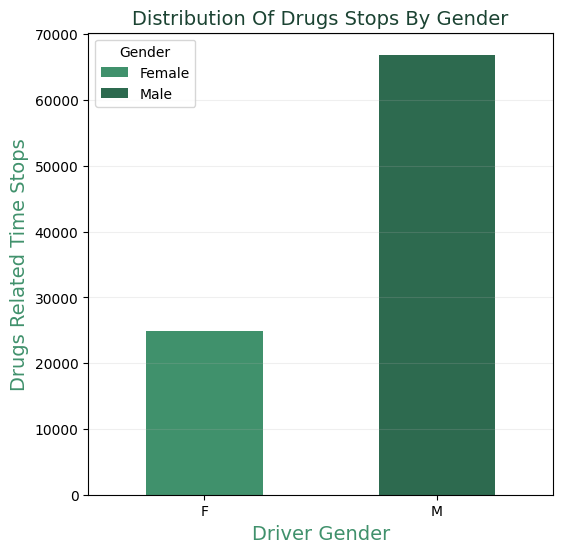

In [26]:
gender_labels = ['Female', 'Male']
plt.figure(figsize=(6,6))
bars = Stop_by_gender.plot(kind='bar', color=['#40916C', '#2D6A4F'])
plt.xlabel('Driver Gender',fontsize=14, color = '#40916C')
plt.ylabel('Drugs Related Time Stops',fontsize=14, color = '#40916C')
plt.legend(bars.get_children()[:2], gender_labels, title='Gender')
plt.title('Distribution Of Drugs Stops By Gender',fontsize=14, color = '#1B4332')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.2)
plt.show()


In [27]:
# average age of drivers involved in stops
ave_age_stop = df.groupby('stop_outcome')['driver_age'].mean()
print(f'Average age of drivers involved in stops by Policeman:',ave_age_stop)

Average age of drivers involved in stops by Policeman: stop_outcome
Arrest Driver       31.128086
Arrest Passenger    30.406824
Citation            33.268897
N/D                 32.483923
No Action           35.105769
Warning             34.532805
Name: driver_age, dtype: float64


In [28]:
com_stop_out = df.groupby('stop_outcome')['stop_outcome'].count()
print(f'Top 5 Most Common Stops Outcomes:', com_stop_out.nlargest(5))

Top 5 Most Common Stops Outcomes: stop_outcome
Citation         81771
Warning           5548
Arrest Driver     2795
No Action          624
N/D                622
Name: stop_outcome, dtype: int64


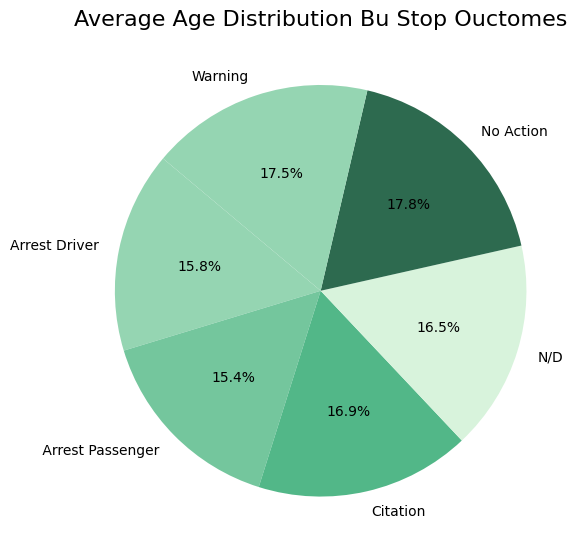

In [29]:
c = ['#95D5B2','#74C69D','#52B788','#D8F3DC','#2D6A4F']
labels = ['Arrest Driver',' Arrest Passenger','Citation','N/D','No Action','Warning']

piechar = ave_age_stop.index.to_numpy()
pie_values = ave_age_stop.to_numpy()

plt.figure(figsize = (6,6))
plt.pie(pie_values,labels = labels, autopct = '%1.1f%%', startangle = 140,colors = c)
plt.title('Average Age Distribution Bu Stop Ouctomes', fontsize = 16)
plt.axis = ('equal')
plt.tight_layout()
plt.show()

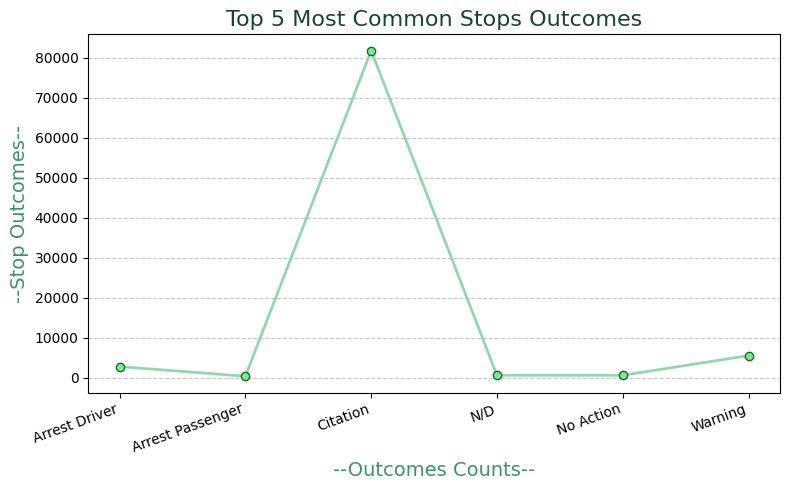

In [30]:
plt.figure(figsize=(8, 5)) 
plt.plot(com_stop_out, color='#95D5B2', marker='o', linestyle='-', linewidth=2, markeredgecolor='green')

plt.title('Top 5 Most Common Stops Outcomes', fontsize=16, color = '#1B4332')
plt.xlabel('--Outcomes Counts--', fontsize=14, color = '#40916C')
plt.ylabel('--Stop Outcomes--', fontsize=14, color = '#40916C')
plt.xticks(rotation=20, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()

In [31]:
arested_time = df.groupby('is_arrested')['stop_time'].sum()
arested_time

is_arrested
False    01:5508:1523:1510:0009:4517:3013:2010:1515:451...
True     17:1502:0901:0006:2000:0000:5009:3013:2613:260...
Name: stop_time, dtype: object

In [32]:
Driver_race = df.groupby('driver_race')['driver_race'].count()

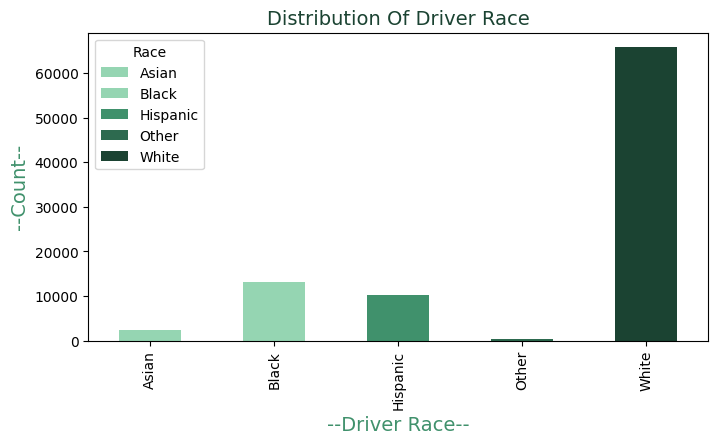

In [33]:
colors = ['#95D5B2', '#95D5B2', '#40916C', '#2D6A4F', '#1B4332']
Race_Labels = ['Asian', 'Black', 'Hispanic', 'Other', 'White']
plt.figure(figsize=(8,4))
bars = Driver_race.plot(kind='bar', color=colors)
plt.title('Distribution Of Driver Race',fontsize=14, color = '#1B4332')
plt.xlabel('--Driver Race--',fontsize=14, color = '#40916C')
plt.ylabel('--Count--',fontsize=14, color = '#40916C')
plt.legend(bars.get_children()[:5], Race_Labels, title='Race')
plt.show()


In [34]:
Violation_dist = df.groupby('violation_raw')['violation_raw'].count()
print(f'Top 3 Most Common Violation Is',Violation_dist.nlargest(3))

Top 3 Most Common Violation Is violation_raw
Speeding                          51334
Other Traffic Violation           17340
Equipment/Inspection Violation    11658
Name: violation_raw, dtype: int64


In [35]:
sear_con = df.groupby('search_conducted')['search_conducted'].count()

In [36]:
sear_con

search_conducted
False    88545
True      3196
Name: search_conducted, dtype: int64

In [37]:
stop_drug = df.drugs_related_stop.sum()
print(f'Policeman stops because of Drugs Related suspects:', stop_drug)

Policeman stops because of Drugs Related suspects: 815


In [38]:
arrest_rate_race = df.groupby('driver_race')['is_arrested'].count()
arrest_rate_race

driver_race
Asian        2383
Black       13080
Hispanic    10241
Other         257
White       65780
Name: is_arrested, dtype: int64

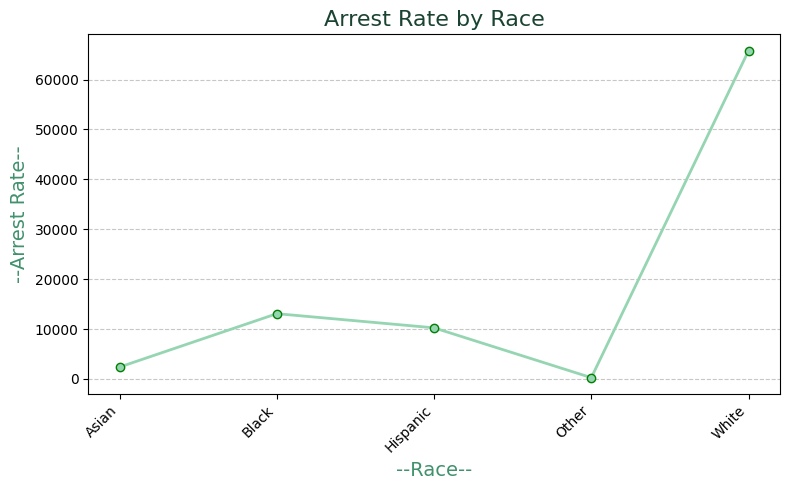

In [39]:
plt.figure(figsize=(8, 5)) 
plt.plot(arrest_rate_race, color='#95D5B2', marker='o', linestyle='-', linewidth=2, markeredgecolor='green')

plt.title('Arrest Rate by Race', fontsize=16, color = '#1B4332')
plt.xlabel('--Race--', fontsize=14, color = '#40916C')
plt.ylabel('--Arrest Rate--', fontsize=14, color = '#40916C')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()

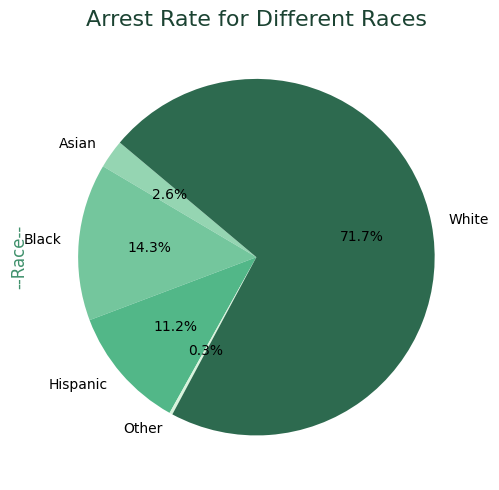

In [48]:
cc = ['#95D5B2','#74C69D','#52B788','#D8F3DC','#2D6A4F']

plt.figure(figsize = (7,5))
arrest_rate_race.plot(kind = 'pie', colors = cc,autopct='%1.1f%%', startangle=140,)
plt.title('Arrest Rate for Different Races', fontsize=16, color = '#1B4332')
plt.tight_layout()
#plt.xlabel('Arrested')
plt.ylabel('--Race--', fontsize = 12,color = '#40916C')
plt.show()

In [49]:
search_conduced_gender = df.groupby('driver_gender')['search_conducted'].count()
print(search_conduced_gender)

driver_gender
F    24843
M    66898
Name: search_conducted, dtype: int64


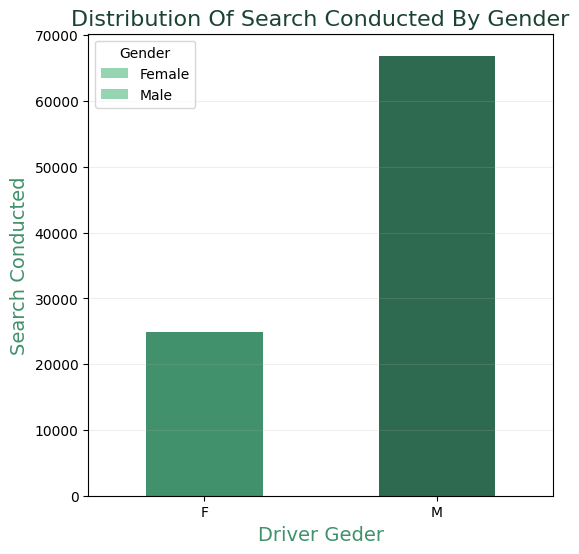

In [50]:
gender_labelss =['Female','Male']
plt.figure(figsize=(6,6))
search_conduced_gender.plot(kind = 'bar', color=['#40916C', '#2D6A4F'])
plt.title('Distribution Of Search Conducted By Gender',fontsize=16, color = '#1B4332')
plt.xlabel('Driver Geder', color = '#40916C', fontsize=14)
plt.ylabel('Search Conducted', color = '#40916C', fontsize=14)
plt.legend(bars.containers[0],gender_labelss, title='Gender')
plt.xticks(rotation = 0)
plt.grid(axis ='y', alpha = 0.2)
plt.show()

In [51]:
df.describe()

,driver_age_raw,driver_age
count,91741.000000,91741.000000
mean,1970.491228,33.275395
std,107.646547,12.673854
min,0.000000,15.000000
25%,1968.000000,22.000000
50%,1978.000000,29.000000
75%,1986.000000,42.000000
max,8801.000000,99.000000


In [56]:
report = ProfileReport(df, title = 'Dataset Report')
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]